### 활성화 함수 : 정보가 활성화 되는지 혹은 정보가 할성화된다면 어떻게 활성화되어 출력 값을 생성해내는지 결정하는 함수

In [ ]:
import numpy as np
import matplotlib.pylab as plt

#### 1. 계단 함수의 그래프 : 0보다 크면 1, 0보다 작으면 0

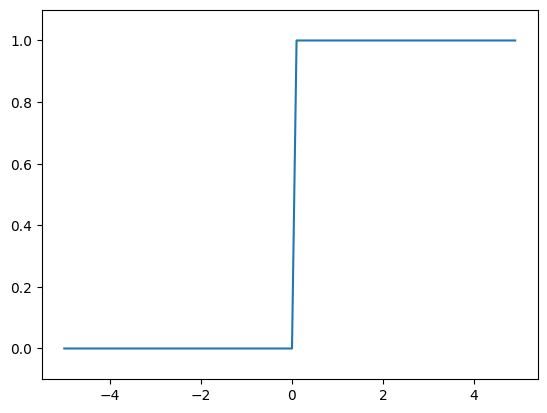

In [ ]:
def step_function(x):
    return np.array(x > 0)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1) # y축을 제한
plt.show()

#### 2. 시그모이드 함수 구현하기 : 계단 함수보다 부드럽게

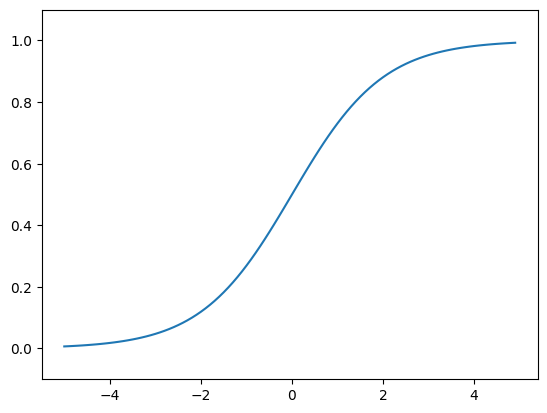

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # np.exp : e^{-x}로 변환

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

##### 2.1 시그모이드 함수와 계단 함수 비교

<ul>
    <li>계단 함수</li>
    <ul>단점
    <li>출력되는 결과값이 갖는 정보가 너무 희석</li>
    </ul>
    <li>시그모이드 함수</li>
    <ul>장점
    <li>기울기가 급격해서 변해서 발산하는 <strong>기울기 폭주 X</strong></li>
    <li>분류는 0, 1로 나뉘며, 출력 값이 어느 값에 가까운지를 통해 어느 분류에 속하는 지 쉽게 알 수 있다</li>
    </ul>
    <ul>단점
    <li>입력값이 아무리 크더라도, 출력되는 값의 범위가 매우 좁음 -> 경사하강법 수행 시 범위가 너무 좁아, 0에 수렴하는 <strong>기울기 소실 발생 가능</strong></li>
    </ul>
</ul>

<ul>
<li>시그모이드 함수는 아무리 큰 값이 들어온다 할지라도 0~1사이의 값만 반환<br>
-> 값이 일정 비율로 줄어들어 값이 현저하게 줄어듦</li>
<li>또한, 출력 값의 중앙값이 0이 아닌 0.5이며, 모두 양수기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커지게 된다.</li>
<li>이를 <b>편향 이동(Bias Gradient)</b>라 하고, 신호가 각 레이어를 통과할 때마다 분산이 계속 커지게 되어, 활성화 함수의 출력이 최댓값과 최솟값인 0과 1에 수렴하게 된다.</li>
<li>시그모이드 함수의 도함수는 $\sigma(1-\sigma)$인데, 도함수에 들어가는 함수의 값이 0이나 1에 가까울수록 당연히 출력되는 값이 0에 가까워지게 된다.</li><br>
<li>이로 인해 수렴되는 뉴련의 기울기(Gradient) 값이 0이 되고, 역전파 시 0이 곱해져서 기울기가 소멸(kill)되는 현상이 발생해버린다!<br><b>즉, 역전파가 진행될수록 아래 층(Layer)에 아무런 신호가 전달되지 않는 것이다!</b></li>
</ul>
<br>
<b>출력층에서 시그모이드 함수를 사용하는 것은 상관 없으나 아래로 정보가 계속 흘러가는 <div style="color:red;">은닉층에서는 시그모이드 함수를 활성화 함수로 사용해서는 안됨</div></b>

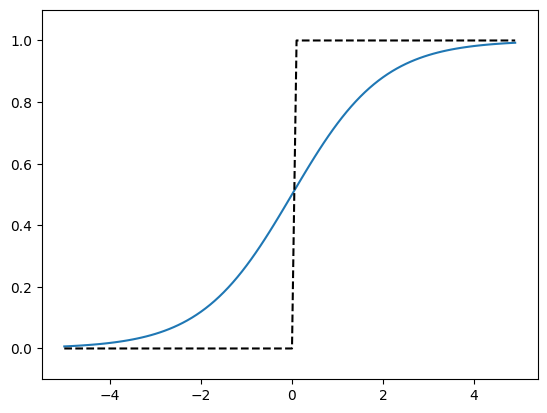

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

#### 3. Softmax 함수

<div>
3개 이상으로 분류하는 다중 분류에 주로 사용
<br><br>
분류될 클래스가 n개라 할 때, n차원의 벡터를 입력받아, 각 클래스에 속할 확률을 추정
</div>

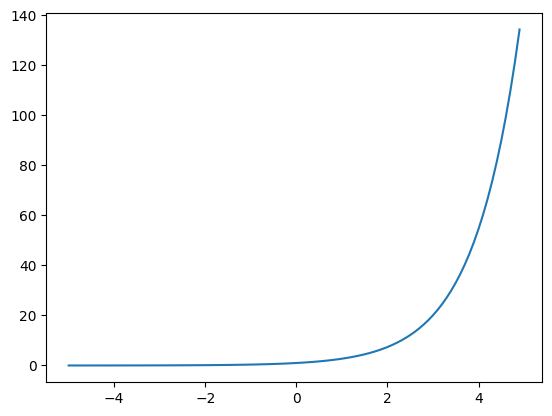

In [ ]:
# 가볍게 지수함수를 그려보자

x = np.arange(-5, 5, 0.1)
y = np.exp(x)

plt.plot(x,y)
plt.show()

In [ ]:
# 소프트맥스
def softmax(x):
    """ 소프트맥스 함수
    Input : array
    Output : array
    """
    
    # Input 값에 Input 값의 최댓값을 뺀다. -> 값이 커졌을 때 runtimewarning이 뜨는 것을 방지하지 위해
    array_x = x - np.max(x)
    exp_x = np.exp(array_x)
    result = exp_x/np.sum(exp_x)

    return result

print(np.exp(3))

20.085536923187668


#### 4. ReLU 함수

<ul>
<li>렐루 함수는 우리 말로, 정류된 선형 함수라고 하는데,<br>간단하게 말해서 +/-가 반복되는 신호에서 -흐름을 차단한다는 의미다.<br>
<b>입력값이 0보다 크면 자기 자신을 반환, 그렇지 않으면 0을 반환</b></li><br>
<li>은닉층에서 굉장히 많이 사용, 은닉층에 어떤 함수를 써야할지 모르겠다면 그냥 사용(물론 신경망을 의도를 가지고 써보고 싶다면 그래선 안됨)</li>
</ul>

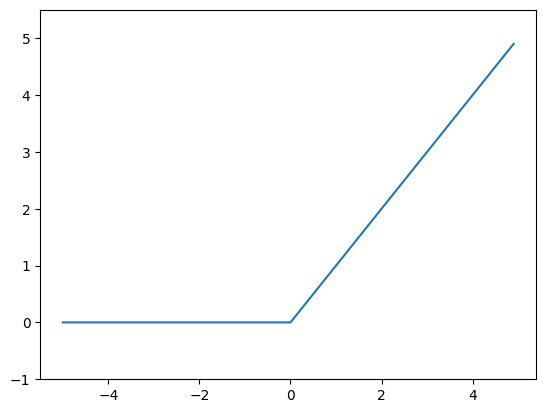

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()